In [10]:
import pandas as pd
import helpers.data_mining_helpers as dmh
import numpy as np
categories = ['Positive', 'Negetive']
data = pd.read_table('C:/Users/AmazeTim/Desktop/JuypterFile/DM2020-Lab1-Master-master/sentiment labelled sentences/imdb_labelled.txt',header=None,encoding='utf8')

In [11]:
X = pd.DataFrame(list(data[0]), columns= ['text'])

In [16]:
X['Score']= data[1] 

In [17]:
f= lambda s: 'Positive' if s == 1 else 'Negetive' #my method
X['category_name'] = X.Score.apply(lambda x: f(x))

In [18]:
X_sample = X.sample(n=256) #random state
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
import nltk
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer()
X_freqs =tf_idf_vect.fit_transform(X.text)

In [50]:
X_freqs.shape
X_freqs[0:20,0:20].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0

In [61]:
tf_idf_vect.get_feature_names()[0:20]

['10',
 '12',
 '13',
 '15',
 '15pm',
 '17',
 '18th',
 '1928',
 '1947',
 '1948',
 '1949',
 '1971',
 '1973',
 '1980',
 '1986',
 '1995',
 '1998',
 '20',
 '2005',
 '2006']

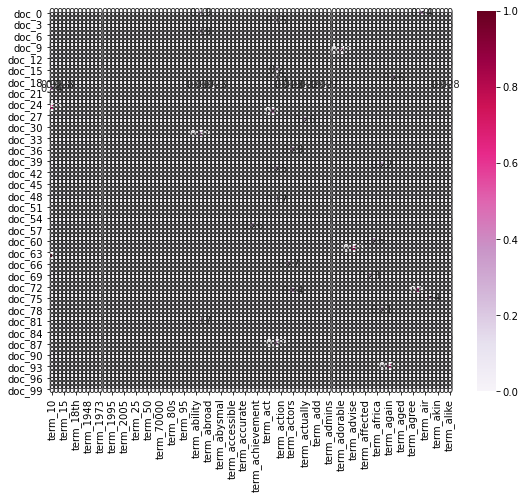

In [62]:
import seaborn as sns
plot_x = ["term_"+str(i) for i in tf_idf_vect.get_feature_names()[0:100]]
plot_y   = ["doc_"+ str(i) for i in list(X.index)[0:100]]
plot_z  =  X_freqs[0:100,0:100].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [77]:
from sklearn.datasets import make_classification

nb_samples = 300
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0)

In [79]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_gnb_score = gnb.predict_proba(X_test)
lr = LogisticRegression() 
lr.fit(X_train, Y_train)
Y_lr_score = lr.decision_function(X_test)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(Y_test, Y_gnb_score[:, 1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(Y_test, Y_lr_score)

In [80]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

digits = load_digits()
gnb = GaussianNB()
cross_val_score(gnb, digits.data, digits.target, scoring='accuracy', cv=10).mean()

0.8113904407200497